In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

## Step 1: Reading and Understanding the Data

In [3]:
# reading data from csv file
data_bike=pd.read_csv('day.csv')
data_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###  weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy 
### season :  
       - 1:spring
         2:summer
         3:fall
         4:winter


### registered: count of registered users

### cnt: count of total rental bikes including casual and registered
 Fog

In [5]:
# converting dteday from object datatype to date
data_bike['dteday']=pd.to_datetime(data_bike['dteday'],format='%d-%m-%Y',errors='coerce')

In [7]:
# checking the data types
data_bike.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [9]:
data_bike.shape

(730, 16)

In [11]:
#verifying the updated data types
data_bike.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [13]:
# checking for null values
data_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
#categorical values for season 
data_bike['season']=data_bike['season'].map({1:'spring',2:'summer',3:'autumn',4:'winter'})

In [17]:
data_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [19]:
# mapping numerical values of weekday to names to know the days
di={0:'Sunday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Monday',6:'Saturday'}
data_bike['weekday']=data_bike['weekday'].map(di)

In [21]:
#mapping numerical vals of month to names
month_map={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"}
data_bike['mnth']=data_bike['mnth'].map(month_map)

In [23]:
#mapping weather sit numerical vals to string
weather_sit_map={1:"Good",2:"Moderate",3:"Ok",4:"Bad"}
data_bike['weathersit']=data_bike['weathersit'].map(weather_sit_map)

In [25]:
data_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Tuesday,1,Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Wednesday,1,Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Thursday,1,Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,spring,1,Dec,0,Friday,1,Moderate,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,spring,1,Dec,0,Monday,1,Moderate,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,spring,1,Dec,0,Saturday,0,Moderate,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,spring,1,Dec,0,Sunday,0,Good,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [27]:
# dropping instant column as it's just the index
data_bike=data_bike.drop(['instant'],axis=1)

In [31]:
data_bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,0,Jan,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,0,Jan,0,Tuesday,1,Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,0,Jan,0,Wednesday,1,Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,0,Jan,0,Thursday,1,Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,spring,1,Dec,0,Friday,1,Moderate,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,2019-12-28,spring,1,Dec,0,Monday,1,Moderate,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,2019-12-29,spring,1,Dec,0,Saturday,0,Moderate,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,2019-12-30,spring,1,Dec,0,Sunday,0,Good,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [35]:
data_bike['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [37]:
# dropping casual and registered columns as we need total cnt and dteday as we have weekday,workingday and Month
data_bike.drop(['casual','registered','dteday'],axis=1,inplace=True)

In [39]:
data_bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thursday,1,Good,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Friday,1,Moderate,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Monday,1,Moderate,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Saturday,0,Moderate,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,0,Sunday,0,Good,10.489153,11.58500,48.3333,23.500518,1796


In [41]:
data_bike.shape

(730, 12)

In [43]:
data_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Exploratory Data Analysis(EDA)

In [47]:
data_bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Bivariate using Box plot

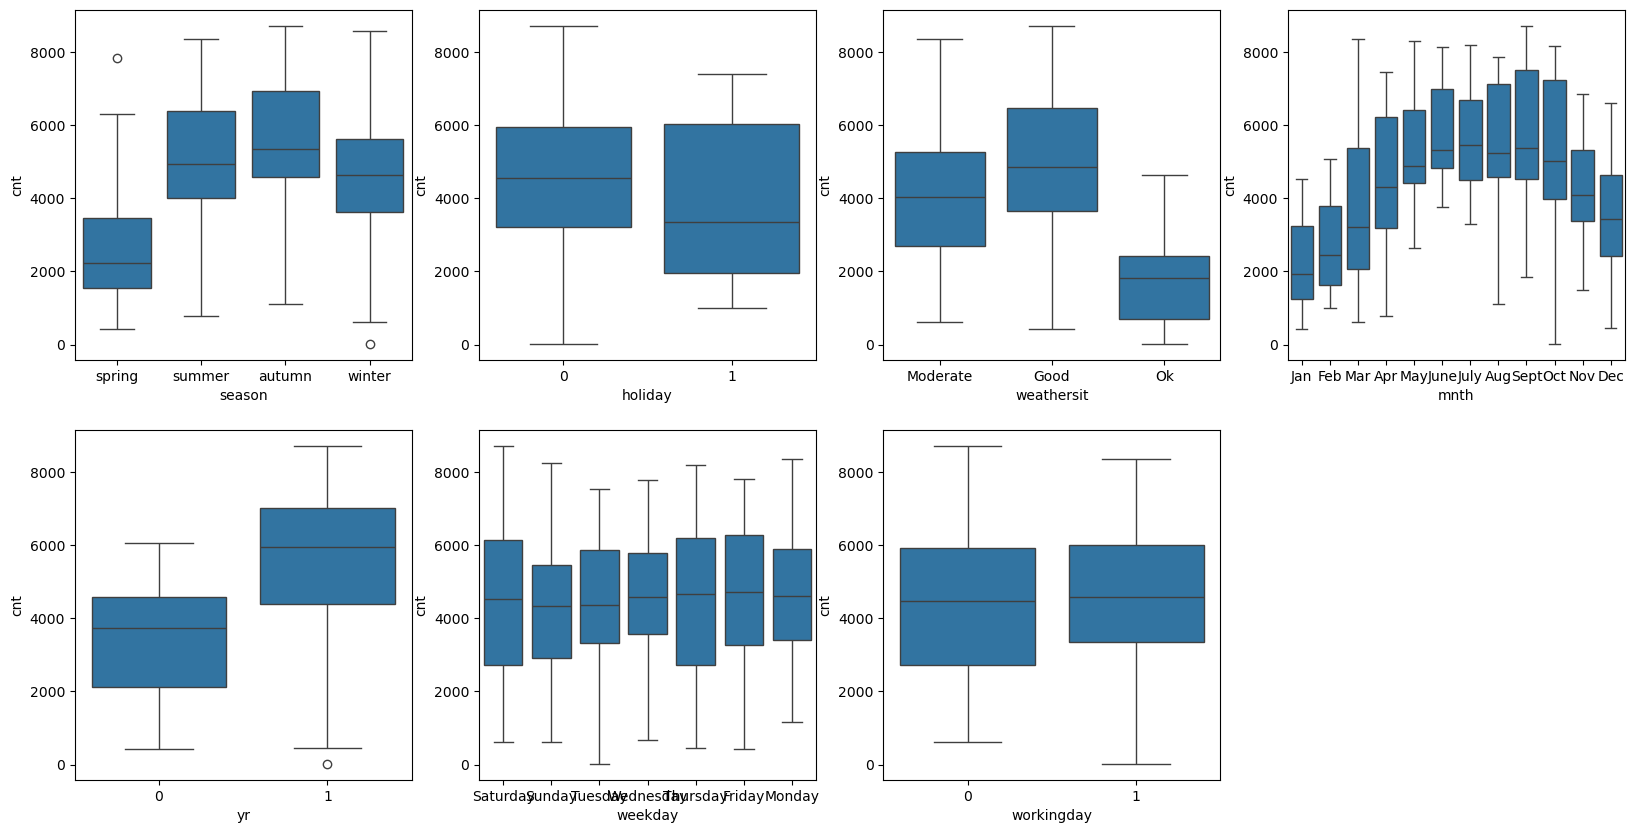

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=data_bike)
plt.subplot(2,4,2)
sns.boxplot(x='holiday',y='cnt',data=data_bike)
plt.subplot(2,4,3)
sns.boxplot(x='weathersit',y='cnt',data=data_bike)
plt.subplot(2,4,4)
sns.boxplot(x='mnth',y='cnt',data=data_bike)
plt.subplot(2,4,5)
sns.boxplot(x='yr',y='cnt',data=data_bike)
plt.subplot(2,4,6)
sns.boxplot(x='weekday',y='cnt',data=data_bike)
plt.subplot(2,4,7)
sns.boxplot(x='workingday',y='cnt',data=data_bike)
plt.show()

## Bi- Variate analysis using Bar plot, scatterplot

<Axes: xlabel='season', ylabel='cnt'>

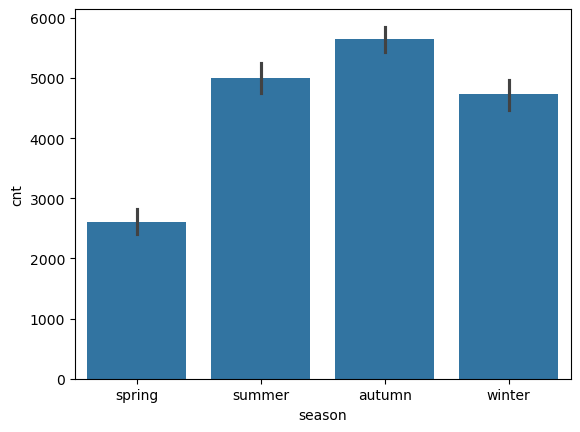

In [42]:
sns.barplot(data=data_bike,x="season",y="cnt")

<Axes: xlabel='workingday', ylabel='cnt'>

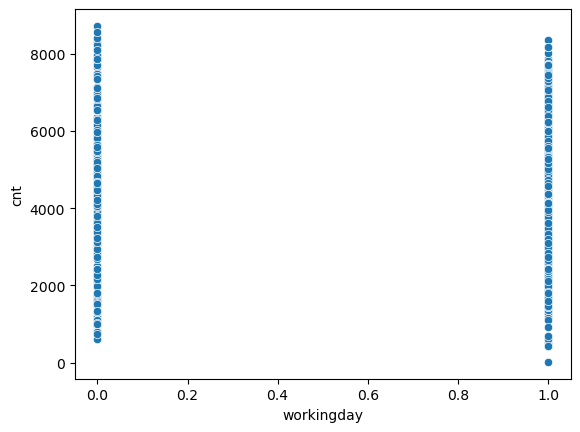

In [43]:
sns.scatterplot(data=data_bike,x='workingday',y='cnt')

## Total cnt of bike is more on non-working day compared to working day

# Uni-Variate using boxplot

<Axes: ylabel='hum'>

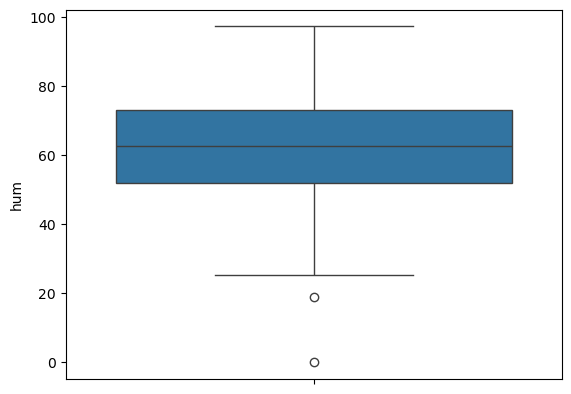

In [47]:

#boxplot on hum column to know the median and outliers
sns.boxplot(data_bike['hum'])

## few values which are away from the minimum extremes are lower outliers

<Axes: ylabel='windspeed'>

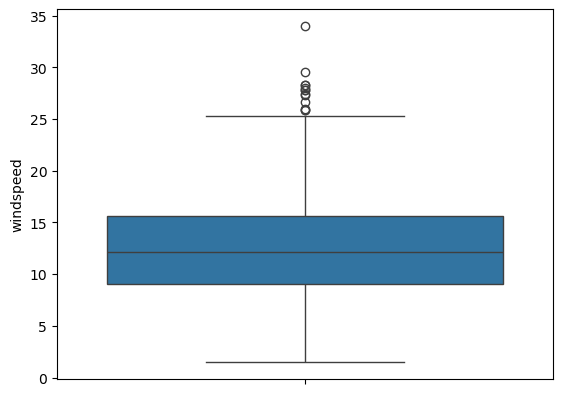

In [49]:
#boxplot on windspeed column to know the median and outliers
sns.boxplot(data_bike['windspeed'])

## Univariate using histplot

<Axes: xlabel='temp', ylabel='Count'>

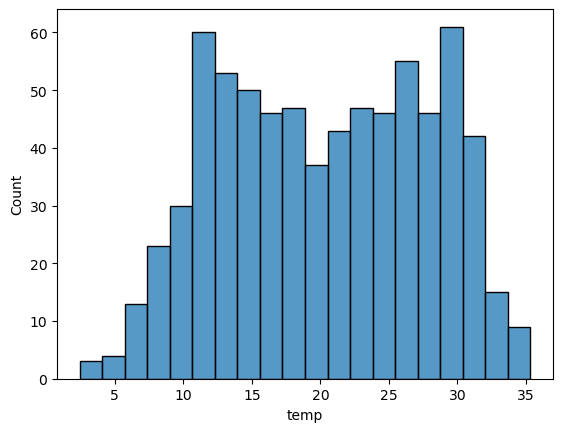

In [51]:
sns.histplot(data_bike['temp'],bins=20)

## 10 and 30 temp values have high frequency

<Axes: xlabel='atemp', ylabel='Count'>

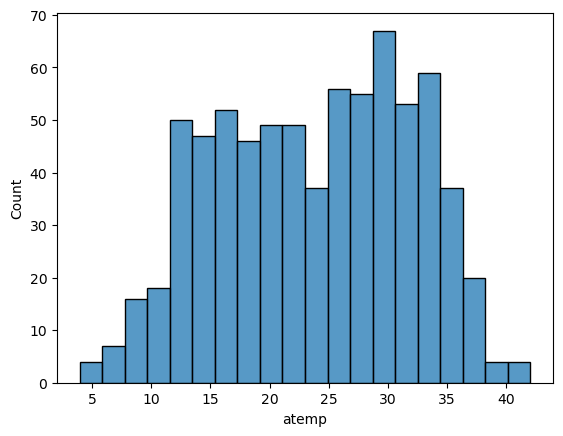

In [53]:
sns.histplot(data_bike['atemp'],bins=20)

<Axes: xlabel='hum', ylabel='Count'>

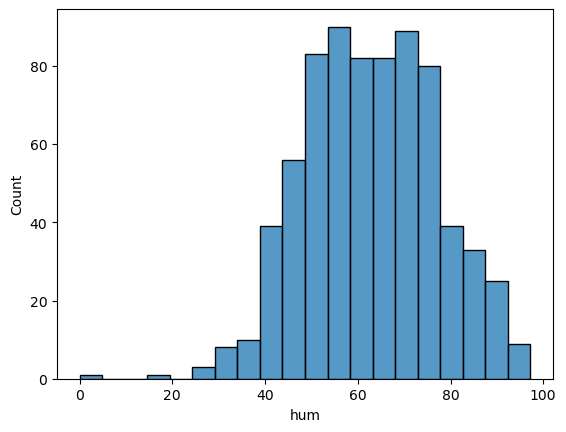

In [55]:
sns.histplot(data_bike['hum'],bins=20)

##  Multi variate analysis

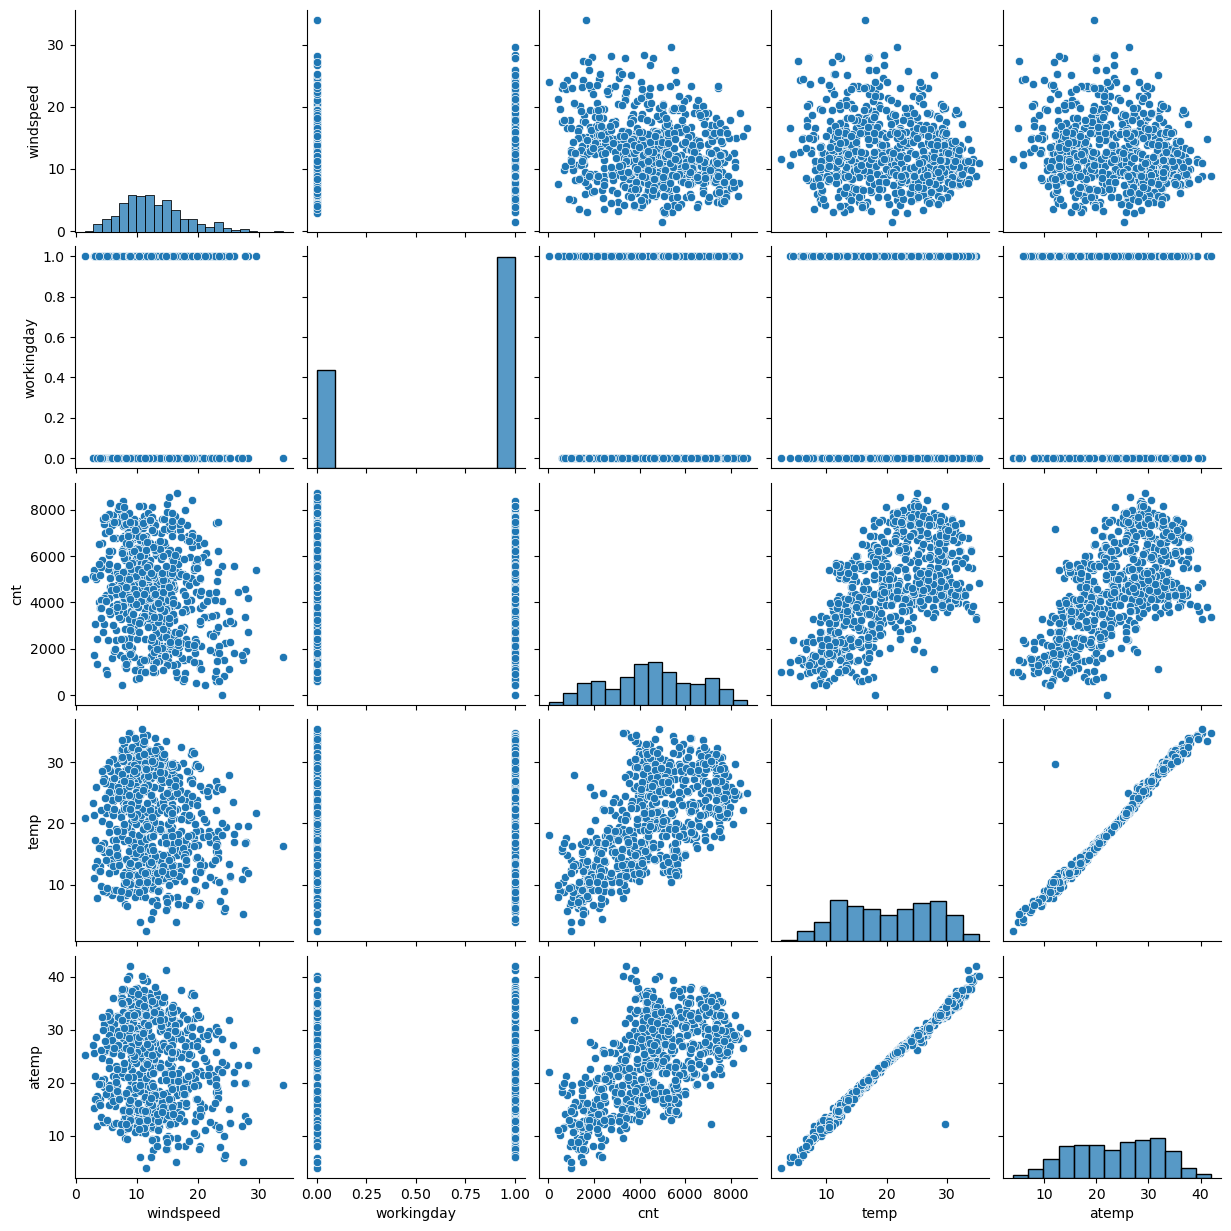

In [57]:
#multivariate analysis on numerical variables
sns.pairplot(data=data_bike,vars=['windspeed','workingday','cnt','temp','atemp'])
plt.show()

In [58]:
data_bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thursday,1,Good,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Friday,1,Moderate,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Monday,1,Moderate,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Saturday,0,Moderate,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,0,Sunday,0,Good,10.489153,11.58500,48.3333,23.500518,1796


## Step 3: Convert categorical variables to dummy for Feature selection and fitting the linear model

In [59]:
data_bike= pd.get_dummies(data=data_bike,columns=["season","mnth","weekday","weathersit"],drop_first=True,dtype=int)
data_bike

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Moderate,weathersit_Ok
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,0,0,0,1,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,1,0,0,0,0,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
data_bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Moderate', 'weathersit_Ok'],
      dtype='object')

In [61]:
data_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Moderate,weathersit_Ok
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


### Step 4: Split the data into train and test

In [67]:
df_train,df_test=train_test_split(data_bike,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Step 5: Min Max Scaling to fit 

In [69]:
# 1.  Instantiate an object
scaler=MinMaxScaler() # fits the values between 0 and 1

# create a list of numerical vars
num_vars=['temp','atemp','hum','windspeed']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train[num_vars]

,temp,atemp,hum,windspeed
576,0.815169,0.766351,0.725633,0.264686
426,0.442393,0.438975,0.640189,0.255342
728,0.245101,0.200348,0.498067,0.663106
482,0.395666,0.391735,0.504508,0.188475
111,0.345824,0.318819,0.751824,0.380981
...,...,...,...,...
578,0.863973,0.824359,0.679690,0.187140
53,0.202618,0.218747,0.435939,0.111379
350,0.248216,0.223544,0.577930,0.431816
79,0.462664,0.434043,0.759870,0.529881


In [71]:
data_bike[num_vars].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


## Step 6: Heatmap

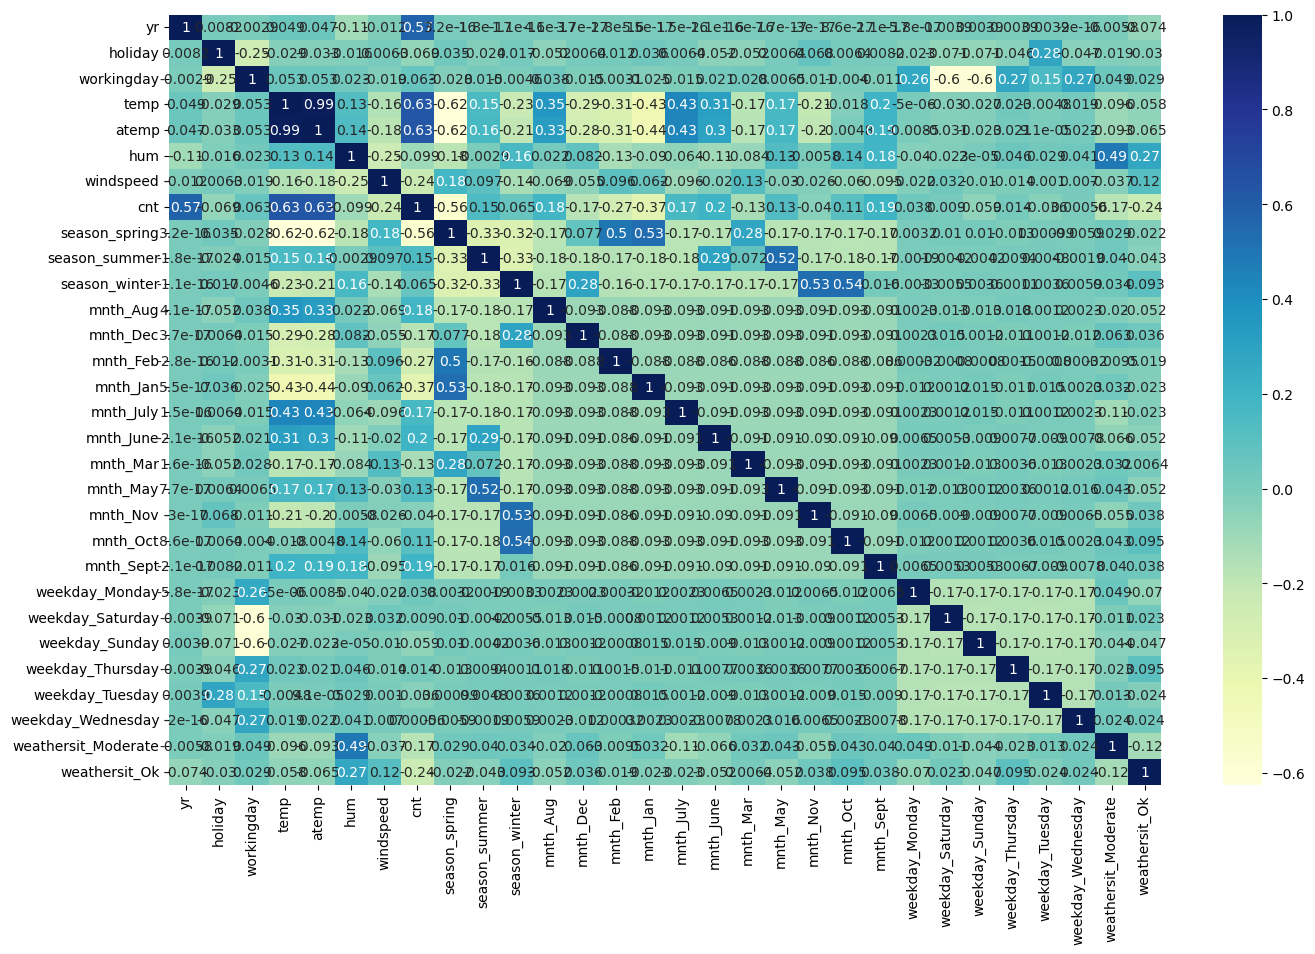

In [73]:
# visualizing the data
plt.figure(figsize=(16,10))
sns.heatmap(data_bike.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [75]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Moderate,weathersit_Ok
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1683,0,1,...,0,0,1,0,0,0,0,0,1,0


In [77]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Moderate,weathersit_Ok
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,0,0,0,0,0,0,1,0,0
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,1,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,1,0,0,0,0,1,0,0,1,0
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,1,0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
# converting non-numeric values to numeric
df_train = df_train.apply(pd.to_numeric, errors='coerce') 


In [81]:
df_test = df_test.apply(pd.to_numeric, errors='coerce')

In [83]:
#target variable is cnt so pop it out
y=df_train.pop('cnt')
X=df_train

In [85]:
print(X.shape)
print(y.shape)

(510, 29)
(510,)


In [87]:
lm=LinearRegression()

In [89]:
import statsmodels.api as sm

## Selecting Features manually ( Iteration -1)

In [91]:
X_train_sm=X['temp']
X_train_sm=sm.add_constant(X_train_sm)
lm=sm.OLS(y,X_train_sm).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           2.46e-61
Time:                        22:08:03   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.2143    170.676      8.737      0.000    1155.897    1826.531
temp        5571.0880    292.813     19.026      0.000    4995.815    6146.361
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#add yr also
X_train_sm=X[['temp','yr']]
X_train_sm=sm.add_constant(X_train_sm)
lm=sm.OLS(y,X_train_sm).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.34e-130
Time:                        22:08:07   Log-Likelihood:                -4287.0
No. Observations:                 510   AIC:                             8580.
Df Residuals:                     507   BIC:                             8593.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        710.9783    129.481      5.491      0.000     456.593     965.363
temp        5078.4395    214.297     23.698      0.000    4657.420    5499.459
yr          2057.7315     96.718     21.276      0.000    1867.714    2247.749
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Add another variable also
X_train_sm=X[['temp','yr','holiday','atemp','windspeed','season_spring','season_summer']]
X_train_sm=sm.add_constant(X_train_sm)
lm=sm.OLS(y,X_train_sm).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     224.6
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.39e-150
Time:                        22:08:08   Log-Likelihood:                -4225.1
No. Observations:                 510   AIC:                             8466.
Df Residuals:                     502   BIC:                             8500.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2268.2965    191.513     11.844      0.000    1892.032    2644.561
temp           1916.0657   1345.559      1.424      0.155    -727.555    4559.687
yr             2096.8535     86.178     24.332      0.000    1927.540    2266.167
holiday        -542.9541    272.658     -1.991      0.047   -1078.646      -7.262
atemp          1702.1378   1441.302      1.181      0.238   -1129.590    4533.866
windspeed     -1438.5878    268.117     -5.366      0.000   -1965.358    -911.817
season_spring -1158.2877    133.645     -8.667      0.000   -1420.860    -895.715
season_summer    24.3552    107.622      0.226      0.821    -187.090     235.801
==============================================================================
Omnibus:                       88.393   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.573
Skew:                          -0.895   Prob(JB):                     1.88e-46
Kurtosis:                       5.590   Cond. No.                         66.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
#drop season_summer as p value is > 0.05
X_train_sm=X_train_sm.drop(['season_summer'],axis=1)
X_train_sm=sm.add_constant(X_train_sm)
lm=sm.OLS(y,X_train_sm).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     262.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.06e-151
Time:                        22:08:09   Log-Likelihood:                -4225.1
No. Observations:                 510   AIC:                             8464.
Df Residuals:                     503   BIC:                             8494.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2274.7406    189.205     12.023      0.000    1903.011    2646.470
temp           1883.9417   1336.788      1.409      0.159    -742.434    4510.317
yr             2097.1412     86.087     24.361      0.000    1928.007    2266.276
holiday        -546.1629    272.032     -2.008      0.045   -1080.623     -11.703
atemp          1732.2975   1433.773      1.208      0.228   -1084.625    4549.220
windspeed     -1427.1034    263.023     -5.426      0.000   -1943.862    -910.345
season_spring -1168.1107    126.280     -9.250      0.000   -1416.213    -920.009
==============================================================================
Omnibus:                       88.958   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.600
Skew:                          -0.899   Prob(JB):                     6.83e-47
Kurtosis:                       5.603   Cond. No.                         65.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
#add new column by dropping season_summer
X_train_sm=X[['temp','yr','holiday','atemp','windspeed','season_spring','season_winter']]
X_train_sm=sm.add_constant(X_train_sm)
lm=sm.OLS(y,X_train_sm).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.30e-151
Time:                        22:08:10   Log-Likelihood:                -4222.4
No. Observations:                 510   AIC:                             8461.
Df Residuals:                     502   BIC:                             8495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1923.2382    240.891      7.984      0.000    1449.959    2396.517
temp           2552.2630   1361.151      1.875      0.061    -121.991    5226.517
yr             2091.3267     85.742     24.391      0.000    1922.869    2259.785
holiday        -586.3511    271.373     -2.161      0.031   -1119.517     -53.185
atemp          1439.5939   1432.897      1.005      0.316   -1375.619    4254.807
windspeed     -1369.2736    263.022     -5.206      0.000   -1886.032    -852.515
season_spring  -948.5127    156.862     -6.047      0.000   -1256.700    -640.325
season_winter   301.7545    128.902      2.341      0.020      48.500     555.009
==============================================================================
Omnibus:                       99.021   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.991
Skew:                          -0.970   Prob(JB):                     1.16e-55
Kurtosis:                       5.854   Cond. No.                         66.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
#add new column by dropping season_summer
X_train_sm=X[['temp','yr','holiday','atemp','windspeed','season_spring','season_winter','hum']]
X_train_sm=sm.add_constant(X_train_sm)
lm=sm.OLS(y,X_train_sm).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     242.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          5.86e-167
Time:                        22:08:12   Log-Likelihood:                -4182.9
No. Observations:                 510   AIC:                             8384.
Df Residuals:                     501   BIC:                             8422.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3639.6216    291.399     12.490      0.000    3067.106    4212.137
temp           2402.4302   1261.105      1.905      0.057     -75.276    4880.137
yr             2016.1637     79.856     25.247      0.000    1859.270    2173.058
holiday        -645.7424    251.489     -2.568      0.011   -1139.845    -151.639
atemp          1912.2971   1328.469      1.439      0.151    -697.759    4522.353
windspeed     -1848.9139    249.231     -7.418      0.000   -2338.581   -1359.246
season_spring  -947.9037    145.320     -6.523      0.000   -1233.416    -662.391
season_winter   470.5118    120.831      3.894      0.000     233.115     707.909
hum           -2654.4629    289.787     -9.160      0.000   -3223.810   -2085.116
==============================================================================
Omnibus:                       85.614   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.134
Skew:                          -0.856   Prob(JB):                     1.42e-46
Kurtosis:                       5.647   Cond. No.                         73.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8 : VIF(Iteration -1)

In [103]:
col=['temp','yr','holiday','atemp','windspeed','season_spring','season_winter','hum']

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1 = X[col]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

        Features     VIF
3          atemp  347.33
0           temp  346.94
7            hum   14.08
4      windspeed    4.01
5  season_spring    2.32
1             yr    2.04
6  season_winter    2.00
2        holiday    1.04


## Drop atemp,temp, hum and rebuild the model as they have VIF > 10 ( Model -2)

In [108]:
#drop atemp,temp,hum and add other columns
X_train_sm=X[['yr','holiday','windspeed','season_spring','season_winter','mnth_Sept','mnth_Aug','mnth_July','mnth_Jan','mnth_Feb','weekday_Monday','mnth_June','mnth_Dec','weathersit_Ok','mnth_Nov','mnth_May','weekday_Saturday','weekday_Tuesday']]
X_train_sm=sm.add_constant(X_train_sm)
lm=sm.OLS(y,X_train_sm).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     99.85
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          4.42e-151
Time:                        22:08:22   Log-Likelihood:                -4194.4
No. Observations:                 510   AIC:                             8427.
Df Residuals:                     491   BIC:                             8507.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3874.2669    163.775     23.656      0.000    3552.481    4196.053
yr                2157.8258     82.110     26.280      0.000    1996.496    2319.155
holiday           -423.4604    274.128     -1.545      0.123    -962.069     115.148
windspeed        -1418.8381    256.173     -5.539      0.000   -1922.169    -915.508
season_spring     -844.5049    184.214     -4.584      0.000   -1206.451    -482.559
season_winter      646.3185    160.362      4.030      0.000     331.239     961.398
mnth_Sept         1160.6681    176.620      6.572      0.000     813.645    1507.692
mnth_Aug          1037.1178    178.606      5.807      0.000     686.192    1388.043
mnth_July          935.0798    189.978      4.922      0.000     561.810    1308.349
mnth_Jan         -1514.3347    202.149     -7.491      0.000   -1911.519   -1117.150
mnth_Feb          -883.8241    215.465     -4.102      0.000   -1307.171    -460.478
weekday_Monday     111.7312    126.960      0.880      0.379    -137.720     361.182
mnth_June         1180.4679    188.935      6.248      0.000     809.248    1551.688
mnth_Dec         -1020.0908    175.447     -5.814      0.000   -1364.811    -675.371
weathersit_Ok    -2305.2329    246.754     -9.342      0.000   -2790.057   -1820.408
mnth_Nov          -776.4537    187.462     -4.142      0.000   -1144.781    -408.127
mnth_May           744.2333    183.775      4.050      0.000     383.151    1105.316
weekday_Saturday   132.4627    117.510      1.127      0.260     -98.422     363.348
weekday_Tuesday    -79.0943    123.228     -0.642      0.521    -321.213     163.024
==============================================================================
Omnibus:                       89.191   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.736
Skew:                          -0.909   Prob(JB):                     4.71e-46
Kurtosis:                       5.554   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Drop weekday_Tuesday as p value is above 0.05

In [110]:
col1=['yr','holiday','windspeed','season_spring','season_winter','mnth_Sept','mnth_Aug','mnth_July','mnth_Jan','mnth_Feb','weekday_Monday','mnth_June','mnth_Dec','weathersit_Ok','mnth_Nov','mnth_May','weekday_Saturday']

In [112]:
X_train_sm=X[col1]
X_train_sm=sm.add_constant(X_train_sm)
lm=sm.OLS(y,X_train_sm).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     105.8
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          5.18e-152
Time:                        22:08:27   Log-Likelihood:                -4194.6
No. Observations:                 510   AIC:                             8425.
Df Residuals:                     492   BIC:                             8501.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3858.4789    161.820     23.844      0.000    3540.535    4176.423
yr                2155.1743     81.957     26.297      0.000    1994.146    2316.202
holiday           -471.6943    263.469     -1.790      0.074    -989.357      45.969
windspeed        -1419.0676    256.020     -5.543      0.000   -1922.094    -916.041
season_spring     -840.3020    183.988     -4.567      0.000   -1201.801    -478.803
season_winter      644.2672    160.234      4.021      0.000     329.440     959.094
mnth_Sept         1164.8421    176.394      6.604      0.000     818.263    1511.421
mnth_Aug          1039.7750    178.451      5.827      0.000     689.155    1390.395
mnth_July          937.3841    189.830      4.938      0.000     564.406    1310.362
mnth_Jan         -1518.1166    201.943     -7.518      0.000   -1914.893   -1121.340
mnth_Feb          -883.8753    215.336     -4.105      0.000   -1306.967    -460.784
weekday_Monday     127.6218    124.448      1.026      0.306    -116.893     372.137
mnth_June         1181.6167    188.813      6.258      0.000     810.637    1552.597
mnth_Dec         -1020.1028    175.342     -5.818      0.000   -1364.615    -675.591
weathersit_Ok    -2303.2569    246.588     -9.341      0.000   -2787.751   -1818.762
mnth_Nov          -768.7178    186.962     -4.112      0.000   -1136.061    -401.374
mnth_May           748.4959    183.545      4.078      0.000     387.867    1109.125
weekday_Saturday   147.6589    115.032      1.284      0.200     -78.355     373.673
==============================================================================
Omnibus:                       88.605   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.747
Skew:                          -0.904   Prob(JB):                     1.28e-45
Kurtosis:                       5.542   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Drop holiday as p value is above 0.05 (Iteration -2)

In [114]:
col2=['yr','windspeed','season_spring','season_winter','mnth_Sept','mnth_Aug','mnth_July','mnth_Jan','mnth_Feb','weekday_Monday','mnth_June','mnth_Dec','weathersit_Ok','mnth_Nov','mnth_May','weekday_Saturday']

In [116]:
X_train_sm=X[col2]
X_train_sm=sm.add_constant(X_train_sm)
lm=sm.OLS(y,X_train_sm).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     111.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.35e-152
Time:                        22:08:33   Log-Likelihood:                -4196.3
No. Observations:                 510   AIC:                             8427.
Df Residuals:                     493   BIC:                             8499.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3844.6281    161.996     23.733      0.000    3526.340    4162.916
yr                2157.2103     82.132     26.265      0.000    1995.839    2318.582
windspeed        -1423.2065    256.581     -5.547      0.000   -1927.334    -919.079
season_spring     -838.4047    184.396     -4.547      0.000   -1200.704    -476.106
season_winter      652.0469    160.533      4.062      0.000     336.634     967.460
mnth_Sept         1150.1355    176.597      6.513      0.000     803.161    1497.110
mnth_Aug          1049.8925    178.760      5.873      0.000     698.668    1401.118
mnth_July          947.4466    190.171      4.982      0.000     573.801    1321.092
mnth_Jan         -1530.4023    202.277     -7.566      0.000   -1927.834   -1132.971
mnth_Feb          -902.2263    215.572     -4.185      0.000   -1325.780    -478.673
weekday_Monday     134.7119    124.663      1.081      0.280    -110.224     379.648
mnth_June         1192.5745    189.136      6.305      0.000     820.963    1564.186
mnth_Dec         -1027.4432    175.686     -5.848      0.000   -1372.629    -682.257
weathersit_Ok    -2287.5268    246.982     -9.262      0.000   -2772.793   -1802.261
mnth_Nov          -808.4013    186.059     -4.345      0.000   -1173.967    -442.836
mnth_May           760.2581    183.837      4.135      0.000     399.057    1121.460
weekday_Saturday   162.7188    114.980      1.415      0.158     -63.193     388.630
==============================================================================
Omnibus:                       92.399   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.718
Skew:                          -0.933   Prob(JB):                     1.94e-48
Kurtosis:                       5.618   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Drop weekday_Monday as p value is above 0.05 (Iteration -2)

In [120]:
col2=['yr','windspeed','season_spring','season_winter','mnth_Sept','mnth_Aug','mnth_July','mnth_Jan','mnth_Feb','mnth_June','mnth_Dec','weathersit_Ok','mnth_Nov','mnth_May','weekday_Saturday']

In [122]:
X_train_sm_3=X[col2]
X_train_sm_3=sm.add_constant(X_train_sm_3)
lm=sm.OLS(y,X_train_sm_3).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     119.1
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.77e-153
Time:                        22:11:01   Log-Likelihood:                -4196.9
No. Observations:                 510   AIC:                             8426.
Df Residuals:                     494   BIC:                             8494.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3865.7179    160.844     24.034      0.000    3549.696    4181.740
yr                2155.1662     82.124     26.243      0.000    1993.811    2316.521
windspeed        -1422.8314    256.624     -5.544      0.000   -1927.041    -918.622
season_spring     -837.0249    184.423     -4.539      0.000   -1199.375    -474.675
season_winter      652.2583    160.560      4.062      0.000     336.794     967.723
mnth_Sept         1150.1702    176.627      6.512      0.000     803.138    1497.202
mnth_Aug          1055.2509    178.721      5.904      0.000     704.103    1406.399
mnth_July          951.6482    190.163      5.004      0.000     578.019    1325.277
mnth_Jan         -1530.3923    202.311     -7.565      0.000   -1927.889   -1132.895
mnth_Feb          -901.1881    215.607     -4.180      0.000   -1324.807    -477.569
mnth_June         1189.4392    189.146      6.288      0.000     817.810    1561.068
mnth_Dec         -1024.8410    175.699     -5.833      0.000   -1370.051    -679.631
weathersit_Ok    -2303.7851    246.565     -9.344      0.000   -2788.230   -1819.340
mnth_Nov          -816.1331    185.953     -4.389      0.000   -1181.488    -450.778
mnth_May           760.7077    183.868      4.137      0.000     399.448    1121.968
weekday_Saturday   142.2413    113.427      1.254      0.210     -80.617     365.100
==============================================================================
Omnibus:                       92.348   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.536
Skew:                          -0.928   Prob(JB):                     4.75e-49
Kurtosis:                       5.651   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Drop weekday_Saturday as p value is above 0.05 (Iteration -2)

In [126]:
col3=['yr','windspeed','season_spring','season_winter','mnth_Sept','mnth_Aug','mnth_July','mnth_Jan','mnth_Feb','mnth_June','mnth_Dec','weathersit_Ok','mnth_Nov','mnth_May']
X_train_sm_4=X[col3]
X_train_sm_4=sm.add_constant(X_train_sm_4)
lm=sm.OLS(y,X_train_sm_4).fit() # running linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     127.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          7.16e-154
Time:                        22:12:29   Log-Likelihood:                -4197.7
No. Observations:                 510   AIC:                             8425.
Df Residuals:                     495   BIC:                             8489.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3881.3313    160.454     24.190      0.000    3566.077    4196.586
yr             2151.7243     82.125     26.200      0.000    1990.367    2313.082
windspeed     -1405.7022    256.409     -5.482      0.000   -1909.486    -901.918
season_spring  -831.1574    184.470     -4.506      0.000   -1193.598    -468.717
season_winter   657.1285    160.606      4.092      0.000     341.575     972.682
mnth_Sept      1151.5607    176.725      6.516      0.000     804.337    1498.785
mnth_Aug       1060.3945    178.778      5.931      0.000     709.138    1411.651
mnth_July       955.0309    190.254      5.020      0.000     581.226    1328.836
mnth_Jan      -1530.4612    202.428     -7.561      0.000   -1928.186   -1132.736
mnth_Feb       -911.3820    215.578     -4.228      0.000   -1334.943    -487.821
mnth_June      1192.4002    189.240      6.301      0.000     820.587    1564.213
mnth_Dec      -1019.3434    175.746     -5.800      0.000   -1364.644    -674.043
weathersit_Ok -2299.5287    246.684     -9.322      0.000   -2784.205   -1814.852
mnth_Nov       -821.3595    186.013     -4.416      0.000   -1186.833    -455.887
mnth_May        754.7593    183.913      4.104      0.000     393.412    1116.106
==============================================================================
Omnibus:                       89.748   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.403
Skew:                          -0.893   Prob(JB):                     5.08e-49
Kurtosis:                       5.697   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 9: Calculate VIF ( Iteration -2)

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1 = X[col3]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

         Features   VIF
2   season_spring  4.05
1       windspeed  3.11
3   season_winter  2.69
7        mnth_Jan  2.15
0              yr  1.90
8        mnth_Feb  1.86
12       mnth_Nov  1.79
10       mnth_Dec  1.54
5        mnth_Aug  1.21
9       mnth_June  1.19
13       mnth_May  1.19
6       mnth_July  1.16
4       mnth_Sept  1.13
11  weathersit_Ok  1.07


In [131]:
y_pred_train=lm.predict(X_train_sm_4)

In [137]:
from sklearn.metrics import r2_score

## R2 Score for train using model selection (Iteration -2)

In [139]:
r2_score(y,y_pred_train)

0.7826445785306283

## Adj R2 Score for train

In [141]:
r2=0.78
n=X.shape[0]
p=X.shape[1]

adj_r2=1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7667083333333333

## Step 10: Feature Selection using RFE

In [296]:
lm=LinearRegression()
lm.fit(X,y) # fit linear model on train data
rfe=RFE(estimator=lm,n_features_to_select=15)
rfe=rfe.fit(X,y)

In [298]:
# finding ranking and support for independent variables
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Moderate', True, 1),
 ('weathersit_Ok', True, 1)]

In [357]:
col_rfe=X.columns[rfe.support_] # selecting the true feature columns
col_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_July', 'mnth_Sept', 'weekday_Saturday', 'weathersit_Moderate',
       'weathersit_Ok'],
      dtype='object')

In [359]:
# creating X_train dataframe with RFE Selected variables
X_train_rfe=X[col_rfe]
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_July,mnth_Sept,weekday_Saturday,weathersit_Moderate,weathersit_Ok
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,1,0
79,0,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,1,0


In [361]:
y

576    7216
426    4066
728    1796
482    4220
111    1683
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 510, dtype: int64

In [363]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_July', 'mnth_Sept', 'weekday_Saturday', 'weathersit_Moderate',
       'weathersit_Ok'],
      dtype='object')

In [365]:
import statsmodels.api as sm


## Step 11: Build  linear model method

In [367]:
# adding a constant and fitting it on a linear regression line
def build_model(col):
    X_train_rfe=sm.add_constant(X[col])
    lm=sm.OLS(y,X_train_rfe).fit() # Running linear model
    print(lm.summary())

## step 12: calculate VIF method

In [369]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(col):
    df1 = X[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Invoke build_model method by passing coln supported by RFE

In [371]:
build_model(col_rfe) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          4.22e-191
Time:                        23:30:55   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2211.4527    

## Step 13: Invoke calc_vif method

In [373]:
calc_vif(col_rfe)

               Features    VIF
4                   hum  29.37
3                  temp  17.78
2            workingday   5.31
5             windspeed   4.73
6         season_spring   4.53
8         season_winter   3.46
7         season_summer   2.85
13  weathersit_Moderate   2.29
0                    yr   2.09
12     weekday_Saturday   1.98
9              mnth_Jan   1.67
10            mnth_July   1.59
11            mnth_Sept   1.39
14        weathersit_Ok   1.24
1               holiday   1.18


## Step 14: removing hum as it has high VIF

In [375]:
col_new_rfe=['holiday','windspeed','yr','season_summer','season_winter','mnth_July','mnth_Sept','weathersit_Ok','workingday','season_spring','temp']
build_model(col_new_rfe)
calc_vif(col_new_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.13e-170
Time:                        23:31:49   Log-Likelihood:                -4165.7
No. Observations:                 510   AIC:                             8355.
Df Residuals:                     498   BIC:                             8406.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1291.9665    279.975      4.615

## Step 15: Remove working day as p value > 0.05

In [379]:
col_new_rfe_1=['holiday','windspeed','yr','season_summer','season_winter','mnth_July','mnth_Sept','weathersit_Ok','season_spring','temp']
build_model(col_new_rfe_1)
calc_vif(col_new_rfe_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.81e-171
Time:                        23:33:47   Log-Likelihood:                -4166.6
No. Observations:                 510   AIC:                             8355.
Df Residuals:                     499   BIC:                             8402.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1370.8892    273.687      5.009

## VIF Value for all features is between 1-5 so no multi collinearity

In [397]:
X[col_new_rfe_1]

,holiday,windspeed,yr,season_summer,season_winter,mnth_July,mnth_Sept,weathersit_Ok,season_spring,temp
576,0,0.264686,1,0,0,1,0,0,0,0.815169
426,0,0.255342,1,0,0,0,0,0,1,0.442393
728,0,0.663106,1,0,0,0,0,0,1,0.245101
482,0,0.188475,1,1,0,0,0,0,0,0.395666
111,0,0.380981,0,1,0,0,0,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...
578,0,0.187140,1,0,0,0,0,0,0,0.863973
53,0,0.111379,0,0,0,0,0,0,1,0.202618
350,0,0.431816,0,0,1,0,0,0,0,0.248216
79,0,0.529881,0,1,0,0,0,0,0,0.462664


## Residual Analysis

In [411]:
def build_lr_model(X,y):
    lr1=LinearRegression()
    lr1.fit(X,y)
    return lr1

In [413]:
lr=build_lr_model(X[col_new_rfe_1],y)

In [417]:
y_train_pred=lr.predict(X[col_new_rfe_1])
y_train_pred

array([6351.16152579, 4528.4481036 , 3151.75650343, 5320.91776402,
       2828.36519579, 6920.17886153, 6784.53053536, 5905.64025411,
       5702.79723009, 5483.10319389, 6916.74368501, 4408.12269346,
       6103.61668875, 4952.20290486, 6507.98938348, 6493.77909753,
       4564.03341995, 5268.42758071, 4951.37314171, 4753.42624657,
       5769.07291682, 6401.78250679, 5002.786592  , 2969.22975041,
       7004.61415967, 3926.39030959, 6578.6429378 , 6101.85663784,
       4548.20794578, 3582.9676119 , 3975.40741357, 5855.12338587,
       3979.41956148, 4593.31492475, 5854.90787667, 2767.18623419,
       4231.12621671, 6781.42450333, 7482.92533419, 4870.55620829,
       4300.42535272, 4201.63525692, 1407.50595625, 6682.76808444,
       4705.02622396, 5771.8082212 , 6632.10850995, 5406.71238458,
       6668.73685473, 4270.41755619, 6603.7013596 , 5393.36240953,
       4186.31802555, 5973.18449674, 4738.00547881, 6230.95547514,
       4375.58785899, 7179.91739168, 6074.70323907, 3326.89970

In [419]:
y

576    7216
426    4066
728    1796
482    4220
111    1683
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 510, dtype: int64

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

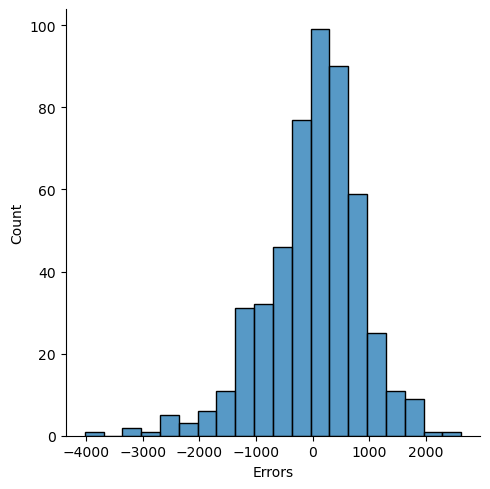

In [514]:
fig=plt.figure()
sns.displot((y-y_train_pred),bins=20)
fig.suptitle('Error terms',fontsize=20)
plt.xlabel('Errors',fontsize=10)

## Residual errors are centred around zero

In [423]:
from sklearn.metrics import r2_score

## R2_Score for train

In [426]:
r2_score(y,y_train_pred)

0.8076137158576726

## Adjusted R2_Score for train

In [442]:
r2=0.8076137158576726
n=X.shape[0]
p=X.shape[1]

adj_r2=1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.795990377857407

In [479]:
X_test=df_test
y_test=df_test.pop('cnt')

KeyError: 'cnt'

In [447]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
702    6606
127    4333
640    7572
72     2046
653    7534
Name: cnt, Length: 220, dtype: int64

In [449]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Moderate,weathersit_Ok
184,0,1,0,29.793347,33.27085,63.7917,5.459106,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,0,0,1,...,1,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,0,0,1,...,0,0,0,0,0,0,0,1,0,0
127,0,0,0,21.661653,25.94665,63.1667,5.000712,0,1,0,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,0,0,1,...,1,0,0,0,0,1,0,0,1,0
72,0,0,1,13.333897,16.60000,49.6957,9.174042,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [451]:
print(X_test.shape)
print(y_test.shape)

(220, 29)
(220,)


In [467]:
col_new_rfe_1

['holiday',
 'windspeed',
 'yr',
 'season_summer',
 'season_winter',
 'mnth_July',
 'mnth_Sept',
 'weathersit_Ok',
 'season_spring',
 'temp']

In [469]:
X_test_sm_1=X_test[col_new_rfe_1]

In [471]:
X_test_sm_1

,holiday,windspeed,yr,season_summer,season_winter,mnth_July,mnth_Sept,weathersit_Ok,season_spring,temp
184,1,5.459106,0,0,0,1,0,0,0,29.793347
535,0,7.625404,1,1,0,0,0,0,0,32.082500
299,0,13.250121,0,0,1,0,0,0,0,19.270000
221,0,13.417286,0,0,0,0,0,0,0,31.433347
152,0,19.583229,0,1,0,0,0,0,0,29.315000
...,...,...,...,...,...,...,...,...,...,...
702,0,11.666643,1,0,1,0,0,0,0,19.509153
127,0,5.000712,0,1,0,0,0,0,0,21.661653
640,0,4.458569,1,0,1,0,0,0,0,26.957500
72,0,9.174042,0,0,0,0,0,0,1,13.333897


In [491]:
X_test_trans=scaler.transform(X_test[col_new_rfe_1])

## Residual Analysis for test

In [493]:
y_test_pred=lr.predict(X_test_trans)

C:\Users\Meher Teja\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [495]:
y_test_pred

array([ 3814.65161751,  7567.76875234,  3760.76375169,  4791.1616303 ,
        4582.07600639,  3336.46668589,  4258.78851999,  4372.97702175,
        6158.29546101,  4701.57709629,  6878.29754096,  6260.1697308 ,
        4026.7055462 ,  5425.76896708,  1398.59024428,  6752.82565357,
        4609.33307366,   500.30432583,  4719.7101117 ,  5050.07589978,
        6851.15320959,  5545.69481837,  6772.1180817 ,  1275.35638297,
        3916.40947143,  3896.05306059,  7132.52383803,  4068.02107645,
        6660.760045  ,  4147.39898853,  6695.36155971,  6496.44646946,
        4786.94274049,  6085.39695838,  1478.03492569,  4270.30199855,
        4644.25049375,  5749.10715006,  1253.03900503,  3519.39092372,
        3867.73941307,  2602.29772994,  5138.5521218 ,  5126.62567111,
        4622.22750634,  6682.82596382,  1641.11769781,  5585.81779824,
        4882.1877046 ,  2866.96926353,  6525.26372939,  4445.28333006,
        4466.3819599 ,  6578.97244612,  3482.15170003,  6840.25494693,
      

In [497]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
702    6606
127    4333
640    7572
72     2046
653    7534
Name: cnt, Length: 220, dtype: int64

C:\Users\Meher Teja\AppData\Local\Temp\ipykernel_26508\266325737.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_test_pred),bins=20)


Text(0.5, 0, 'Errors')

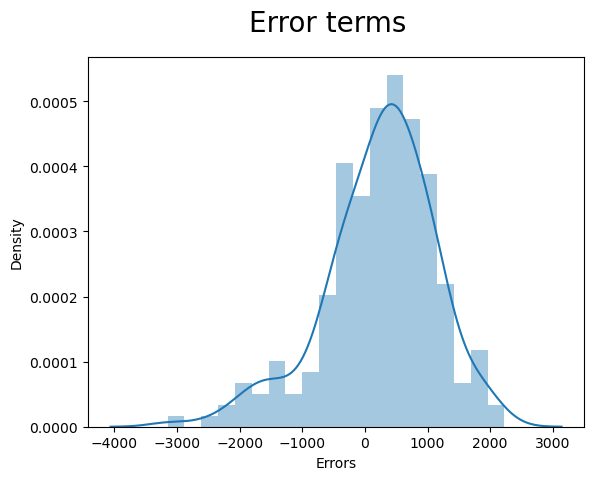

In [499]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=20)
fig.suptitle('Error terms',fontsize=20)
plt.xlabel('Errors',fontsize=10)

## R2_Score for test

In [505]:
r2_score(y_test,y_test_pred)

0.7666266203787299

## Adjusted R2_score for test

In [509]:
r2=0.7666
n=X_test.shape[0]
p=X_test.shape[1]

adj_r2=1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7309757894736841

## Visualizing the fit on test data


Text(0, 0.5, 'y_test_pred')

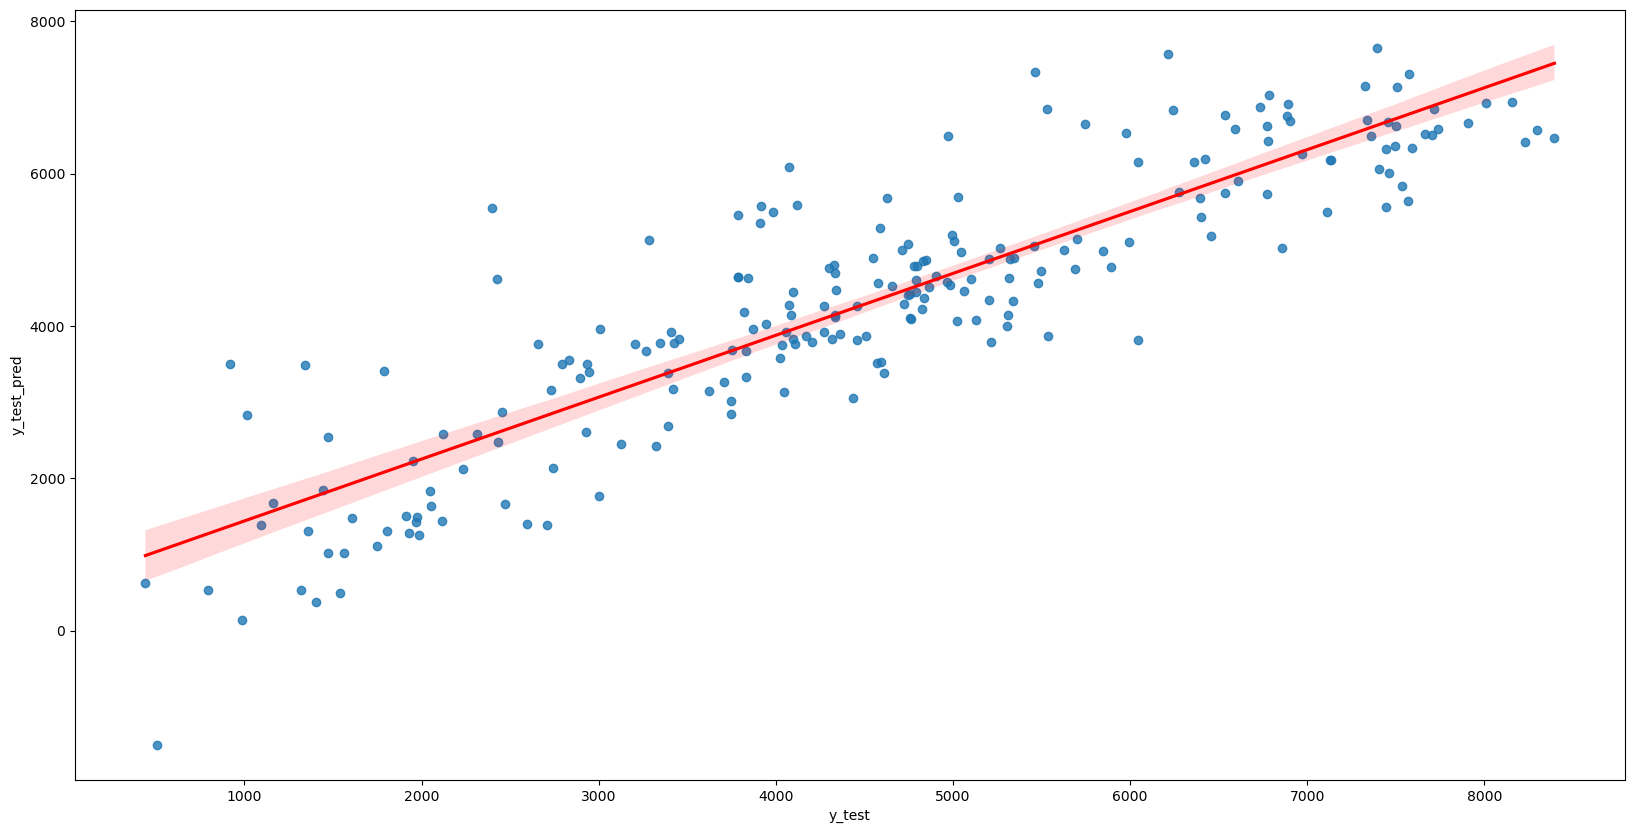

In [511]:
plt.figure(figsize=(20,10))
sns.regplot(x=y_test,y=y_test_pred,line_kws={'color':'red'})
plt.xlabel("y_test",fontsize=10)
plt.ylabel("y_test_pred",fontsize=10)           

### Factors contributing the demand for shared bike as per VIF
   1) temp
   2) windspeed
   3) season_summer
   4)  yr
   5)  season_spring
   6)  season_winter
   7)  mnth_July
   8)  mnth_Sept
   9)  weathersit_Ok
   10) holiday